## Компьютерный практикум №2. Метрики расстояний и кластерный анализ методом к-средних

<p style="text-indent: 25px;">
    Доброго времени суток, <b>Елена Константиновна</b>!
</p>
<p style="text-indent: 25px;">
    Темой лабораторной является <b>метрики и кластерный анализ</b>. Кластерный анализ является одной из главных задач машинного обучения. Его основная идея состоит в том, чтобы разбить обьекты на классы (так называемые <i>"кластеры"</i>) исходя из характеристик этих самых обьектов. Данный подход называется <i>обучением без учителя</i> (<i>обучение с учителем</i> - это по сути задача классификации, когда классы заранее определены, и необходимо построить алгоритм для получения классов). Фишка кластерного анализа в том, что исследователю заранее неизвестно классы обьектов, и их может быть неограниченное количество (от 2 до <i>n</i>). Это даёт возможность получить дополнительную информацию о том, как отличаются между собой обьекты и по каким характеристикам.
</p>
<p style="text-indent: 25px;">
    Одним из наиболее известных методов кластерного анализа, и соответственно, одним из самых простых, является метод к-средних. Главная идея в том, что исследователь сам задает необходимое количество кластеров, после чего случайным образом генерируется центры (центроиды) кластеров, к которым присоединяются наиболее близкие к ним обьекты. Собственно для этого и нужно знать так называемые метрики расстояний, так как они позволяют находить расстояния между обьектами, которые представляют из себя точки в многомерном пространстве. Наиболее известной метрикой является эвклидова, однако, чтобы подобрать необходимую метрику, нужно учесть задачу, для которой данная метрика и используется.
<p style="text-indent: 25px;">
    Задания в данной лабораторной следующие:
    <ol>
        <li><i>Реализовать разные виды метрик в виде отдельных функций.</i></li>
        <li><i>Реализовать алгоритм кластеризации к-средних с использованием разработанных функций.</i></li>
        <li><i>Провести кластерный анализ с разбитием на 3, 4 и 5 кластеров на стандартизированных данных (согласно варианту).</i></li>
        <li><i>Визуализировать результаты кластеризации.</i></li>
        <li><i>Сформировать выводы о результатах кластеризации (количество обьектов в кластерах, краткая характеристика обьектов с помощью описательной статистики).</i></li>
    </ol>
</p>
<p style="text-indent: 25px;">
    Прежде чем приступить к заданиям, для начала импортируем необходимые библиотеки.
</p>

### 1. Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# pd.options.mode.chained_assignment = None  # default='warn'

<p style="text-indent: 25px;">
    Затем загрузим наши данные. В данной лабораторной по варианту (№1) я должна использовать данные о диабете, в качестве переменных (характеристик обьектов) будут выступать: гемоглобин, вес и протромбированное время.
</p>

![Варианты](Screenshot_1.png)

### 2. Загрузка данных

In [2]:
init_data = pd.read_excel('Diabet.xlsx')
init_data

,№,Уровень холестерина,Стабілізована глюкоза,Ліпопротеїни,Співвідношення холестерину до ліпопротеїну,Гемоглобін,Вік,Стать,Зріст,Вага,Систолічний тиск,Діастолічний тиск,Талія (дюйм),Стегна (дюйми),Протромбіновий час
0,1000,203.0,82,56.0,3.6,4.310000,46,female,62.0,121.0,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,29,female,64.0,218.0,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,58,female,61.0,256.0,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,67,male,67.0,119.0,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,64,male,68.0,183.0,138.0,80.0,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,53,male,69.0,173.0,138.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,51,female,63.0,154.0,140.0,100.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,29,female,69.0,167.0,120.0,70.0,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,41,female,63.0,197.0,120.0,78.0,41.0,48.0,255.0


In [3]:
init_data.columns

Index(['№', 'Уровень холестерина', 'Стабілізована глюкоза', 'Ліпопротеїни',
       'Співвідношення холестерину до ліпопротеїну', 'Гемоглобін', 'Вік',
       'Стать', 'Зріст', 'Вага', 'Систолічний тиск', 'Діастолічний тиск',
       'Талія (дюйм)', 'Стегна (дюйми)', 'Протромбіновий час'],
      dtype='object')

In [4]:
init_data = init_data[['Гемоглобін', 'Вага', 'Протромбіновий час']]
init_data

,Гемоглобін,Вага,Протромбіновий час
0,4.310000,121.0,720.0
1,4.440000,218.0,360.0
2,4.640000,256.0,180.0
3,4.630000,119.0,480.0
4,7.720000,183.0,300.0
...,...,...,...
398,16.110001,173.0,210.0
399,4.390000,154.0,180.0
400,13.630000,167.0,20.0
401,4.490000,197.0,255.0


<p style="text-indent: 25px;">
    Из вывода видно, что датафрейм имеет пропущенные значения (помечены как <b>NaN</b>). Посмотрим также на то, в каких диапазонах лежат столбцы. 
</p>

In [5]:
init_data.describe()  # describe - статистическое описание данных

,Гемоглобін,Вага,Протромбіновий час
count,390.000000,402.000000,400.000000
mean,5.589769,177.592040,341.250000
std,2.242595,40.340666,309.540953
min,2.680000,99.000000,5.000000
25%,4.380000,151.000000,90.000000
50%,4.840000,172.500000,240.000000
75%,5.600000,200.000000,517.500000
max,16.110001,325.000000,1560.000000


<p style="text-indent: 25px;">
    Четко видно, что данные столбцы несоизмеримы, соответственно необходимо эти данные нормализовать.
</p>
<p style="text-indent: 25px;">
    Сперва реализуем функцию для замены пропущенных значений (будем заменять средними). 
</p>

In [6]:
# замена пропущенных значений
def replacing(df, col_name):
    mean_val = np.mean(df[col_name])
    for i in range(df.shape[0]):
        if np.isnan(df.iloc[i][col_name]):
            df[col_name][i] = mean_val
    return df

In [7]:
norm_data = init_data.copy()
for col_name in init_data.columns.tolist():
    norm_data = replacing(norm_data, col_name)
norm_data

,Гемоглобін,Вага,Протромбіновий час
0,4.310000,121.0,720.0
1,4.440000,218.0,360.0
2,4.640000,256.0,180.0
3,4.630000,119.0,480.0
4,7.720000,183.0,300.0
...,...,...,...
398,16.110001,173.0,210.0
399,4.390000,154.0,180.0
400,13.630000,167.0,20.0
401,4.490000,197.0,255.0


<p style="text-indent: 25px;">
     Затем реализуем функцию для нормализации данных (будем использовать min-max). 
</p>

In [8]:
# нормализация данных
def normalization(df, col_name):
    df[col_name] = (df[col_name] - np.min(df[col_name])) / (np.max(df[col_name]) - np.min(df[col_name]))
    return df

In [9]:
for col_name in init_data.columns.tolist():
    norm_data = normalization(norm_data, col_name)
norm_data

,Гемоглобін,Вага,Протромбіновий час
0,0.121370,0.097345,0.459807
1,0.131050,0.526549,0.228296
2,0.145942,0.694690,0.112540
3,0.145197,0.088496,0.305466
4,0.375279,0.371681,0.189711
...,...,...,...
398,1.000000,0.327434,0.131833
399,0.127327,0.243363,0.112540
400,0.815339,0.300885,0.009646
401,0.134773,0.433628,0.160772


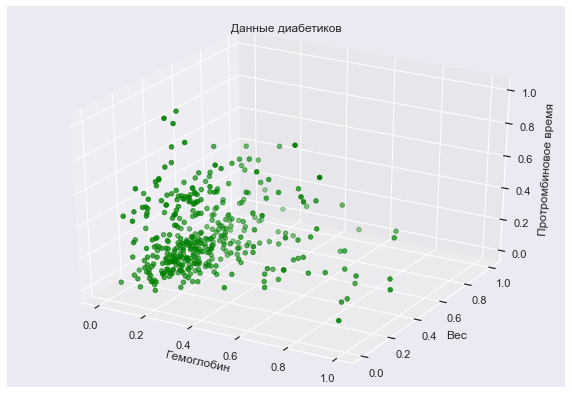

In [10]:
# визуалиция данных
array = norm_data.values
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(array[:, 0], array[:, 1], array[:, 2], color = "green")
plt.title("Данные диабетиков")
ax.set_xlabel('Гемоглобин')  
ax.set_ylabel('Вес')  
ax.set_zlabel('Протромбиновое время') 
plt.show()

<p style="text-indent: 25px;">
     Теперь перейдем непосредственно к заданиям.
</p>

### 3. Метрики (эвклидова, L1 и Чебышева)

In [11]:
# эвклидова метрика
def euclidean(p1, p2):
    dist = 0
    for i in range(p1.shape[0]):
        dist += (p1[i] - p2[i]) ** 2
    return np.sqrt(dist)

In [12]:
# l1 расстояние
def l1(p1, p2):
    dist = 0
    for i in range(p1.shape[0]):
        dist += np.abs(p1[i] - p2[i])
    return np.sqrt(dist)

In [13]:
# чебышева
def chebyshev(p1, p2):
    dist = []
    for i in range(p1.shape[0]):
        dist.append(np.abs(p1[i] - p2[i]))
    return np.amax(dist)

## 4. Кластеризация методом k-средних

In [14]:
# инициализация центроидов
def initialize_centroids(k, array):
    rs = np.random.RandomState(512)
    X = np.copy(array)
    rs.shuffle(X)
    return X[:k]

In [15]:
# нахождение ближайших к точкам центроидов
def closest_centroid(centroids, array, metric_method):
    dist = np.zeros((centroids.shape[0], array.shape[0]))
    for i in range(centroids.shape[0]):
        for j in range(array.shape[0]):
            if metric_method == 'euclidean':
                dist[i, j] = euclidean(array[j], centroids[i])
            elif metric_method == 'l1':
                dist[i, j] = l1(array[j], centroids[i])
            elif metric_method == 'chebyshev':
                dist[i, j] = chebyshev(array[j], centroids[i])
    return np.argmin(dist, axis=0)

In [16]:
# сдвиг центроцидов
def move_centroids(centroids, clusters):
    for i in range(centroids.shape[0]):
        cluster_indices = np.where(clusters==i)
        centroids[i] = (1 / (cluster_indices[0].size)) * array[cluster_indices[0]].sum(axis=0) 
    return centroids

In [17]:
def kmeans(k, array, metric_method):    
    first_centroids = initialize_centroids(k, array)
    clusters_list = []
    clusters = closest_centroid(first_centroids, array, metric_method)
    clusters_list.append(clusters)
    new_centroids = move_centroids(first_centroids, clusters)
    clusters = closest_centroid(new_centroids, array, metric_method)
    clusters_list.append(clusters)
    i = 1
    while not np.array_equal(clusters_list[i], clusters_list[i - 1]): # условие остановки k-средних
        new_centroids = move_centroids(new_centroids, clusters)
        clusters_list.append(closest_centroid(new_centroids, array, metric_method))
        i += 1 
    return clusters_list[-1]

## 5. Применение кластерного анализа на практике и визуализация результатов

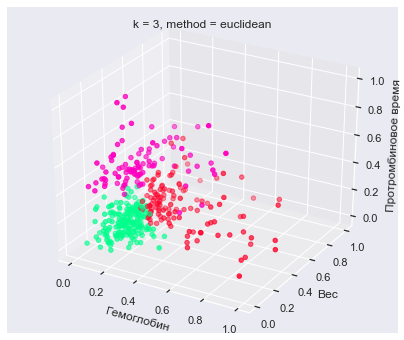

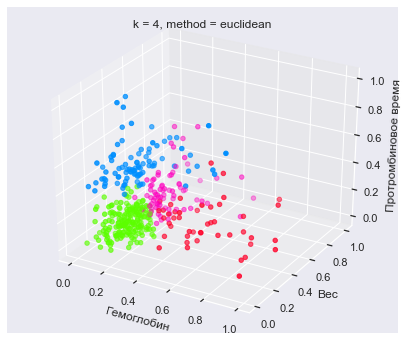

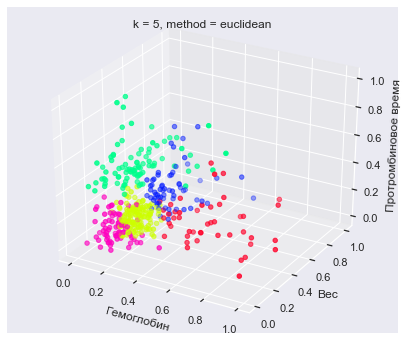

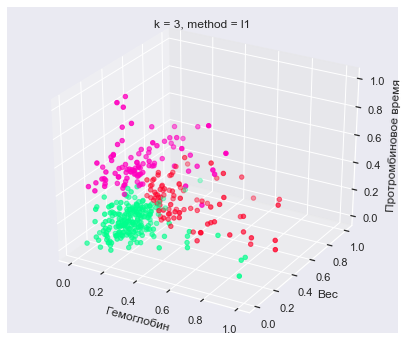

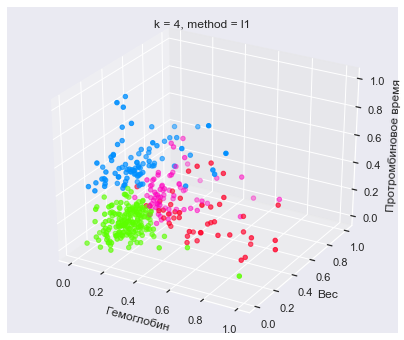

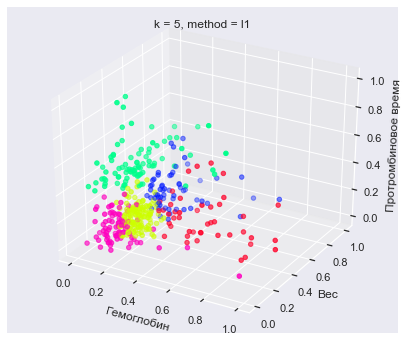

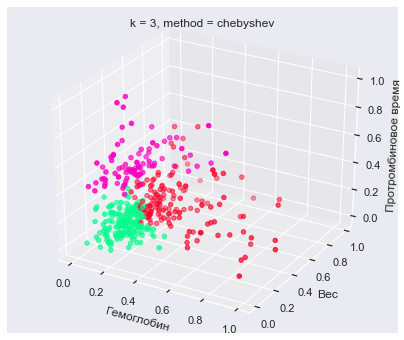

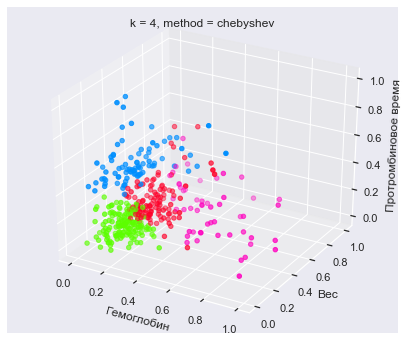

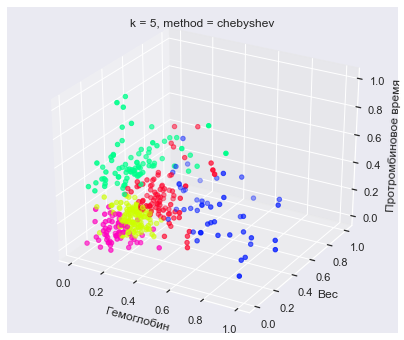

In [18]:
method_list = ['euclidean', 'l1', 'chebyshev']
k_list = [3, 4, 5]
result = []
for method in method_list:
    for k in k_list:
        clusters = kmeans(k, array, method)
        for i in range(k):
            cluster_indices = np.where(clusters == i)
            array_cluster = array[cluster_indices]
            single_result = [method, k, i, np.mean(array_cluster, axis=0), np.std(array_cluster, axis=0), array_cluster.shape[0]]  # std - стандартное отклонение
            
            # внутригрупповая дисперсия
            for j in range(array_cluster.shape[1]):
                array_cluster[:, j] = (array_cluster[:, j] - np.mean(array_cluster[:, j])) ** 2
            var_list = []
            for j in range(array_cluster.shape[0]):
                var_list.append(np.sum(array_cluster[j, :]))
            
            single_result.append(np.mean(var_list))  # добавляем среднее значение дисперсии в результат
            result.append(single_result)
        fig = plt.figure(figsize = (7, 6)) 
        ax = plt.axes(projection ="3d") 
        my_cmap = plt.get_cmap('gist_rainbow')
        ax.scatter3D(array[:, 0], array[:, 1], array[:, 2], c=clusters, cmap=my_cmap)
        title_name = "k = " + str(k) + ", method = " + method
        plt.title(title_name)
        ax.set_xlabel('Гемоглобин')  
        ax.set_ylabel('Вес')
        ax.set_zlabel('Протромбиновое время') 
        plt.show()

## Выводы

In [19]:
result_df = pd.DataFrame(result, columns=['method', 'k', 'cluster_index', 'mean', 'std', 'count', 'mean_variance'])
for i in range(result_df.shape[0]):
    for j in range(result_df.at[i, 'mean'].shape[0]):
        result_df.at[i, 'mean'][j] = round(result_df.at[i, 'mean'][j], 3)
        result_df.at[i, 'std'][j] = round(result_df.at[i, 'std'][j], 3)
result_df

,method,k,cluster_index,mean,std,count,mean_variance
0,euclidean,3,0,"[0.322, 0.521, 0.143]","[0.221, 0.159, 0.102]",123,0.084373
1,euclidean,3,1,"[0.15, 0.252, 0.108]","[0.059, 0.105, 0.081]",185,0.021069
2,euclidean,3,2,"[0.21, 0.31, 0.521]","[0.146, 0.15, 0.132]",95,0.061304
3,euclidean,4,0,"[0.559, 0.376, 0.161]","[0.188, 0.123, 0.113]",46,0.063230
4,euclidean,4,1,"[0.149, 0.26, 0.108]","[0.053, 0.108, 0.08]",191,0.020896
5,euclidean,4,2,"[0.2, 0.294, 0.526]","[0.137, 0.129, 0.133]",89,0.053148
6,euclidean,4,3,"[0.199, 0.611, 0.161]","[0.095, 0.129, 0.128]",77,0.041987
7,euclidean,5,0,"[0.571, 0.388, 0.169]","[0.182, 0.127, 0.129]",46,0.066068
8,euclidean,5,1,"[0.153, 0.344, 0.098]","[0.051, 0.068, 0.073]",132,0.012600
9,euclidean,5,2,"[0.194, 0.294, 0.525]","[0.129, 0.129, 0.134]",88,0.051389


In [20]:
result_df.groupby(['method', 'k']).mean()['mean_variance']

method     k
chebyshev  3    0.053322
           4    0.056824
           5    0.049157
euclidean  3    0.055582
           4    0.044815
           5    0.037232
l1         3    0.060233
           4    0.046941
           5    0.039447
Name: mean_variance, dtype: float64

<p style="text-indent: 25px;">
    Из вывода выше можно увидеть, что наименьшее среднее значение внутригрупповой дисперсии при эвклидовой метрике и k = 5. Это значит, что выборки по кластерам, которые были сформированы, являются наиболее однородными, что позволяет сформулировать гипотезу, что именно такое разделение обьектов по кластерам является наиболее правдивым. Если посмотреть на датафрейм выше, то там видно, что разница между кластерами по количеству обьектов не сильно большая, некоторые кластеры очень однородны, а также есть отличие по средним значениям характеристик. 
</p>